In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import gzip

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string

import dask.dataframe as dd
from dask.multiprocessing import get
import textstat
import swifter

import ast
import math

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import KFold

In [113]:
# GET ALL THE DATAFRAMES :-
# 1.NORMAL REVIEWS
# 2.REVIEW TEXT Characteristics
# 3.USER Charecteristics
# 4.REVIEW METADATA Characteristics
# 5.PRODUCT METADATA

review_df = pd.read_csv('Amazon_Latest_Data.csv')
text_df = pd.read_csv('Text_Parameters.csv')
user_df = pd.read_csv('User_DF.csv')
meta_df = pd.read_csv('Review_Meta_Data.csv')
product_data_df = pd.read_csv('meta_data_latest.csv')
helper_df = pd.read_csv('helper_df.csv')

In [13]:
user_df.columns

Index(['reviewerID', 'reviewerName', 'reviewText', 'user_deviation',
       'user_delay', 'helpful_votes', 'total_votes', 'no_of_reviews',
       'all_helpful_votes', 'all_total_votes', 'all_no_of_reviews'],
      dtype='object')

In [49]:
X = text_df[['flesch_reading_ease', 
       'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'sentence_count', 'wps', 'review_length', 'pos_no', 'neg_no']]

X=X.join(user_df[['user_deviation','user_delay','no_of_reviews']])

X = X.join(meta_df[['stem_sim_length','lem_sim_length','overall']])

X.columns

Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'no_of_reviews', 'stem_sim_length', 'lem_sim_length', 'overall'],
      dtype='object')

In [50]:
X.head()

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,sentence_count,wps,review_length,pos_no,neg_no,user_deviation,user_delay,no_of_reviews,stem_sim_length,lem_sim_length,overall
0,-336.56,0.0,166.3,7.69,211.1,26.44,44,14.000000,176.92,1,427.000000,427,2,4,1.399189,10152000.0,1,15,13,1.0
1,-340.96,0.0,165.9,9.72,210.8,26.37,94,8.666667,175.64,2,423.000000,846,18,8,0.624437,10886400.0,1,24,23,3.0
2,85.52,7.3,6.2,5.92,7.2,5.87,36,7.666667,13.01,23,19.521739,449,7,6,0.510375,7516800.0,1,17,16,2.0
3,66.94,10.8,7.1,8.05,6.3,6.99,11,7.200000,14.00,5,12.800000,64,2,0,0.442171,2678400.0,1,2,2,5.0
4,-43.22,0.0,53.6,8.09,67.2,12.20,15,4.400000,61.55,1,138.000000,138,1,3,1.616074,7603200.0,1,2,2,1.0


In [51]:
y = review_df['helpfulness_score']
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [52]:
xgb_reg = xgb.XGBRegressor()

In [53]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [54]:
predictions=xgb_reg.predict(X_test)

In [55]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.037214149448659396
Root Mean Squared Error (RMSE): 0.1929096924694542
Mean Absolute Error (MAE):      0.13303612335141038


In [ ]:
{'learning_rate': 0.09, 'n_estimators': 200, 'subsample': 1}


In [56]:
xgb_reg_2 = xgb.XGBRegressor(learning_rate=0.09, n_estimators = 200)

In [57]:
xgb_reg_2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.09, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [58]:
predictions_2=xgb_reg.predict(X_test)

In [59]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions_2)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions_2))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions_2)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.037214149448659396
Root Mean Squared Error (RMSE): 0.1929096924694542
Mean Absolute Error (MAE):      0.13303612335141038


In [60]:
params = {
    'learning_rate': [0.01,0.09,0.1,0.2,0.5,0.9], 
    'n_estimators': [200,300,400,500], 
    'subsample': [0.3, 0.5, 0.9, 1]}

In [61]:
params['learning_rate']

[0.01, 0.09, 0.1, 0.2, 0.5, 0.9]

In [65]:
test_dict={'learning_rate':23}

In [63]:
result_df = pd.DataFrame(columns=['learning_rate','n_estimators', 'subsample', 'rmse', 'mae'])

In [70]:
result_df = result_df.append(test_dict, ignore_index=True)
result_df.head()

,learning_rate,n_estimators,subsample,rmse,mae
0,23.0,NaN,NaN,NaN,NaN
1,23.0,NaN,NaN,NaN,NaN


## Customized Grid Search -  22nd April 2019

In [78]:
best_rmse=1000
best_mae=1000
for rate in params['learning_rate'] :
    for estimator in params['n_estimators'] :
        for subsample in params['subsample'] :
            xgb_model = xgb.XGBRegressor(learning_rate= rate, n_estimators = estimator, subsample=subsample)
            xgb_model.fit(X_train,y_train)
            predictions=xgb_model.predict(X_test)
            rmse=math.sqrt(mean_squared_error(y_test,predictions))
            mae=mean_absolute_error(y_test,predictions)
            
            res_dict = {'learning_rate': rate, 'n_estimators': estimator, 'subsample': subsample, 'rmse' : rmse, 'mae' : mae }
            result_df.append(res_dict, ignore_index=True)

            print(res_dict)
            
            if(rmse<=best_rmse) :
                if(mae < best_mae) :
                    best_rmse = rmse
                    best_mae = mae
                    best_learning_rate = rate
                    best_n_estimators = estimator
                    best_subsample = subsample
            

{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.3, 'rmse': 0.20120225962697713, 'mae': 0.15557041057187085}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.5, 'rmse': 0.2014565968018854, 'mae': 0.1557875063361773}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.9, 'rmse': 0.20168651505571994, 'mae': 0.15594161177602933}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 1, 'rmse': 0.20173112319307335, 'mae': 0.15598355410201298}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.3, 'rmse': 0.19531630693234425, 'mae': 0.1407569386813951}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.5, 'rmse': 0.1955291741974878, 'mae': 0.14093732727325198}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.9, 'rmse': 0.1957360203909724, 'mae': 0.1411491700239321}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 1, 'rmse': 0.19581710426115453, 'mae': 0.14121238169282893}
{'learning_rate': 0.01, 'n_estimators': 400, 'subs

In [80]:
best_rmse

0.19237995453006587

In [81]:
best_mae

0.13237502045293073

In [71]:
X['no_of_reviews'].corr(y)

0.07176005541202105

In [72]:
user_df.columns

Index(['reviewerID', 'reviewerName', 'reviewText', 'user_deviation',
       'user_delay', 'helpful_votes', 'total_votes', 'no_of_reviews'],
      dtype='object')

In [73]:
user_df['helpful_votes'].corr(y)

0.09454703111241307

In [74]:
user_df['total_votes'].corr(y)

0.08271041184733528

In [75]:
(user_df['total_votes']-user_df['helpful_votes']).corr(y)

-0.0710923717070309

## Utilizing the All Review Helpfulness Variables - 23rd April 2019

In [117]:
X = text_df[['flesch_reading_ease', 
       'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'sentence_count', 'wps', 'review_length', 'pos_no', 'neg_no']]

X=X.join(user_df[['user_deviation','user_delay','all_no_of_reviews']])

X = X.join(meta_df[['stem_sim_length','lem_sim_length','overall']])

X.columns

Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'all_no_of_reviews', 'stem_sim_length', 'lem_sim_length', 'overall'],
      dtype='object')

In [118]:
X.head()

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,sentence_count,wps,review_length,pos_no,neg_no,user_deviation,user_delay,all_no_of_reviews,stem_sim_length,lem_sim_length,overall
0,-336.56,0.0,166.3,7.69,211.1,26.44,44,14.000000,176.92,1,427.000000,427,2,4,1.399189,10152000.0,4,15,13,1.0
1,-340.96,0.0,165.9,9.72,210.8,26.37,94,8.666667,175.64,2,423.000000,846,18,8,0.624437,10886400.0,11,24,23,3.0
2,85.52,7.3,6.2,5.92,7.2,5.87,36,7.666667,13.01,23,19.521739,449,7,6,0.510375,7516800.0,21,17,16,2.0
3,66.94,10.8,7.1,8.05,6.3,6.99,11,7.200000,14.00,5,12.800000,64,2,0,0.442171,2678400.0,6,2,2,5.0
4,-43.22,0.0,53.6,8.09,67.2,12.20,15,4.400000,61.55,1,138.000000,138,1,3,1.616074,7603200.0,5,2,2,1.0


In [119]:
y = review_df['helpfulness_score']
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [120]:
xgb_reg = xgb.XGBRegressor()

In [121]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [122]:
predictions=xgb_reg.predict(X_test)

In [123]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.037199865040779295
Root Mean Squared Error (RMSE): 0.1928726653540602
Mean Absolute Error (MAE):      0.13295202548339674


In [92]:
X['all_total_votes'].corr(y)

0.08424164406873362

In [93]:
X['all_no_of_reviews'].corr(y)

0.08305330135835792

In [102]:
params = {
    'learning_rate': [0.01,0.09,0.1,0.2,0.5,0.9], 
    'n_estimators': [200,300,400,500], 
    'subsample': [0.3, 0.5, 0.9, 1]}

In [124]:
X.columns

Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'all_no_of_reviews', 'stem_sim_length', 'lem_sim_length', 'overall'],
      dtype='object')

In [125]:
best_rmse_2=1000
best_mae_2=1000
for rate in params['learning_rate'] :
    for estimator in params['n_estimators'] :
        for subsample in params['subsample'] :
            xgb_model = xgb.XGBRegressor(learning_rate= rate, n_estimators = estimator, subsample=subsample)
            xgb_model.fit(X_train,y_train)
            predictions=xgb_model.predict(X_test)
            rmse=math.sqrt(mean_squared_error(y_test,predictions))
            mae=mean_absolute_error(y_test,predictions)
            
            res_dict = {'learning_rate': rate, 'n_estimators': estimator, 'subsample': subsample, 'rmse' : rmse, 'mae' : mae }
            result_df.append(res_dict, ignore_index=True)

            print(res_dict)
            
            if(rmse<=best_rmse_2) :
                if(mae < best_mae_2) :
                    best_rmse_2 = rmse
                    best_mae_2 = mae
                    best_learning_rate_2 = rate
                    best_n_estimators_2 = estimator
                    best_subsample_2 = subsample
            

{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.3, 'rmse': 0.2012084159554802, 'mae': 0.15557619679967602}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.5, 'rmse': 0.2014640776183263, 'mae': 0.15579278624431794}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.9, 'rmse': 0.20168724868842774, 'mae': 0.15594298473079482}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 1, 'rmse': 0.20173107000583726, 'mae': 0.15598412014079477}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.3, 'rmse': 0.19534148559447317, 'mae': 0.14077125605515162}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.5, 'rmse': 0.19558310147023675, 'mae': 0.14097292819348267}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.9, 'rmse': 0.1957797949956035, 'mae': 0.14116391862237285}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 1, 'rmse': 0.19585855784714698, 'mae': 0.1412323518342349}
{'learning_rate': 0.01, 'n_estimators': 400, 'su

In [126]:
best_rmse_2

0.19256150418330997

In [127]:
type(y)

pandas.core.series.Series

In [128]:
y.head()

0    0.800000
1    0.955556
2    0.900000
3    0.789474
4    0.444444
Name: helpfulness_score, dtype: float64

In [130]:
type(predictions)

numpy.ndarray

In [132]:
abs([-10,20])

TypeError: bad operand type for abs(): 'list'

In [136]:
y2 = y.as_matrix()

C:\Users\Trishul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [137]:
y2[0:4]

array([0.8       , 0.95555556, 0.9       , 0.78947368])

In [138]:
predictions[0:4]

array([0.89840955, 0.9178419 , 0.9090657 , 0.9037471 ], dtype=float32)

In [139]:
y.values

array([0.8       , 0.95555556, 0.9       , ..., 0.63636364, 0.41666667,
       0.7826087 ])

### Experiment

In [140]:
X = text_df[['flesch_reading_ease', 
       'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'sentence_count', 'wps', 'review_length', 'pos_no', 'neg_no']]

X=X.join(user_df[['user_deviation','user_delay','no_of_reviews']])

X = X.join(meta_df[['stem_sim_length','lem_sim_length','overall']])

X.columns

Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'no_of_reviews', 'stem_sim_length', 'lem_sim_length', 'overall'],
      dtype='object')

In [141]:
X.head()

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,sentence_count,wps,review_length,pos_no,neg_no,user_deviation,user_delay,no_of_reviews,stem_sim_length,lem_sim_length,overall
0,-336.56,0.0,166.3,7.69,211.1,26.44,44,14.000000,176.92,1,427.000000,427,2,4,1.399189,10152000.0,1,15,13,1.0
1,-340.96,0.0,165.9,9.72,210.8,26.37,94,8.666667,175.64,2,423.000000,846,18,8,0.624437,10886400.0,1,24,23,3.0
2,85.52,7.3,6.2,5.92,7.2,5.87,36,7.666667,13.01,23,19.521739,449,7,6,0.510375,7516800.0,1,17,16,2.0
3,66.94,10.8,7.1,8.05,6.3,6.99,11,7.200000,14.00,5,12.800000,64,2,0,0.442171,2678400.0,1,2,2,5.0
4,-43.22,0.0,53.6,8.09,67.2,12.20,15,4.400000,61.55,1,138.000000,138,1,3,1.616074,7603200.0,1,2,2,1.0


In [142]:
y = review_df['helpfulness_score']
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [143]:
xgb_reg = xgb.XGBRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, subsample=best_subsample)

In [158]:
print("Best Learning Rate : {} , Best No of Estimators : {} , Best Subsample size : {}".format(best_learning_rate, best_n_estimators, best_subsample))

Best Learning Rate : 0.09 , Best No of Estimators : 400 , Best Subsample size : 0.9


In [144]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.09, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9)

In [145]:
predictions=xgb_reg.predict(X_test)

In [146]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.03701004690499021
Root Mean Squared Error (RMSE): 0.19237995453006587
Mean Absolute Error (MAE):      0.13237502045293073


In [147]:
type(y_test)

pandas.core.series.Series

In [148]:
res_df = pd.DataFrame()

In [149]:
res_df

""


In [150]:
res_df['y_test']=y_test

In [151]:
res_df['predictions'] = predictions

In [152]:
res_df.head()

,y_test,predictions
51704,0.931034,0.934962
29896,0.975610,0.911354
9419,0.909091,0.931369
77612,1.000000,0.873410
7954,1.000000,0.874662


In [153]:
res_df['difference'] = res_df['y_test'] - res_df['predictions'] 

In [154]:
res_df['error_abs'] = res_df['difference'].apply(abs)

In [155]:
res_df.head()

,y_test,predictions,difference,error_abs
51704,0.931034,0.934962,-0.003928,0.003928
29896,0.975610,0.911354,0.064256,0.064256
9419,0.909091,0.931369,-0.022278,0.022278
77612,1.000000,0.873410,0.126590,0.126590
7954,1.000000,0.874662,0.125338,0.125338


In [157]:
res_df.sort_values(by=['error_abs'], ascending=False)

,y_test,predictions,difference,error_abs
14416,1.000000,-0.051973,1.051973,1.051973
69520,0.000000,0.917926,-0.917926,0.917926
61109,0.000000,0.916027,-0.916027,0.916027
42479,0.000000,0.915319,-0.915319,0.915319
74862,0.000000,0.908788,-0.908788,0.908788
26938,0.000000,0.906906,-0.906906,0.906906
57389,0.000000,0.904466,-0.904466,0.904466
62249,0.027027,0.928113,-0.901086,0.901086
5371,0.000000,0.900834,-0.900834,0.900834
22696,0.000000,0.897455,-0.897455,0.897455


In [160]:
user_df.head()

,reviewerID,reviewerName,reviewText,user_deviation,user_delay,helpful_votes,total_votes,no_of_reviews,all_helpful_votes,all_total_votes,all_no_of_reviews
0,AMO214LNFCEI4,Amazon Customer,"I'm a professional OTR truck driver, and I bou...",1.399189,10152000.0,12,15,1,12,15,4
1,A3N7T0DY83Y4IG,C. A. Freeman,"Well, what can I say. I've had this unit in m...",0.624437,10886400.0,11,11,1,15,21,11
2,A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Not going to write a long review, even thought...",0.510375,7516800.0,17,18,1,24,30,21
3,A3QH8VQDE7HZCR,costaricachris,Quality was excellent. Instructions were clear...,0.442171,2678400.0,15,19,1,17,24,6
4,A38FGQVJM18OWV,"George S. Mitchell ""gsmitchell""",I checked around Amazon as well as some other ...,1.616074,7603200.0,8,18,1,8,18,5


In [162]:
avg_help=user_df['helpful_votes']/user_df['no_of_reviews']

In [163]:
avg_help.head()

0    12.0
1    11.0
2    17.0
3    15.0
4     8.0
dtype: float64

In [164]:
avg_help.corr(review_df['helpfulness_score'])

0.1161965347854301

In [169]:
avg_total = user_df['total_votes']/user_df['no_of_reviews']
all_avg_help = user_df['all_helpful_votes']/user_df['all_no_of_reviews']
all_avg_total = user_df['all_total_votes']/user_df['all_no_of_reviews']

print("total votes correlation: ",avg_total.corr(review_df['helpfulness_score']))
print("all helfpul correlation: ",all_avg_help.corr(review_df['helpfulness_score']))
print("all total correlation: ",all_avg_total.corr(review_df['helpfulness_score']))

total votes correlation:  0.0733968360582888
all helfpul correlation:  0.08895267631661546
all total correlation:  0.06005336563686367


In [170]:
hscore = review_df['helpfulness_score']

In [172]:
(all_avg_total - all_avg_help).corr(hscore)

-0.23112491522909748

In [167]:
user_df['avg_helpful_votes'] = avg_help

In [174]:
user_df['unhelfpul_votes'] = user_df['total_votes'] - user_df['helpful_votes']

In [175]:
avg_unhelpful = user_df['unhelfpul_votes']/user_df['no_of_reviews']

In [176]:
avg_unhelpful.corr(hscore)

-0.3725002117545532

In [177]:
avg_help.corr(hscore)

0.1161965347854301

In [180]:
user_df['avg_unhelpful_votes'] = avg_unhelpful

In [290]:
user_df['all_unhelpful_votes'] = user_df['all_total_votes'] - user_df['all_helpful_votes'] 

In [291]:
user_df['all_avg_helpful_votes'] = all_avg_help
user_df['all_avg_unhelpful_votes'] = user_df['all_unhelpful_votes']/user_df['all_no_of_reviews']

In [182]:
user_df.head()

,reviewerID,reviewerName,reviewText,user_deviation,user_delay,helpful_votes,total_votes,no_of_reviews,all_helpful_votes,all_total_votes,all_no_of_reviews,avg_helpful_votes,unhelfpul_votes,avg_unhelpful_votes
0,AMO214LNFCEI4,Amazon Customer,"I'm a professional OTR truck driver, and I bou...",1.399189,10152000.0,12,15,1,12,15,4,12.0,3,3.0
1,A3N7T0DY83Y4IG,C. A. Freeman,"Well, what can I say. I've had this unit in m...",0.624437,10886400.0,11,11,1,15,21,11,11.0,0,0.0
2,A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Not going to write a long review, even thought...",0.510375,7516800.0,17,18,1,24,30,21,17.0,1,1.0
3,A3QH8VQDE7HZCR,costaricachris,Quality was excellent. Instructions were clear...,0.442171,2678400.0,15,19,1,17,24,6,15.0,4,4.0
4,A38FGQVJM18OWV,"George S. Mitchell ""gsmitchell""",I checked around Amazon as well as some other ...,1.616074,7603200.0,8,18,1,8,18,5,8.0,10,10.0


### Experiment with avg helpful and avg unhelpful

In [215]:
X = text_df[['flesch_reading_ease', 
       'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'sentence_count', 'wps', 'review_length', 'pos_no', 'neg_no']]

X=X.join(user_df[['user_deviation', 'user_delay','no_of_reviews']])

X = X.join(meta_df[['stem_sim_length','lem_sim_length','overall']])

X.columns

Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'no_of_reviews', 'stem_sim_length', 'lem_sim_length', 'overall'],
      dtype='object')

In [216]:
X.head()

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,sentence_count,wps,review_length,pos_no,neg_no,user_deviation,user_delay,no_of_reviews,stem_sim_length,lem_sim_length,overall
0,-336.56,0.0,166.3,7.69,211.1,26.44,44,14.000000,176.92,1,427.000000,427,2,4,1.399189,10152000.0,1,15,13,1.0
1,-340.96,0.0,165.9,9.72,210.8,26.37,94,8.666667,175.64,2,423.000000,846,18,8,0.624437,10886400.0,1,24,23,3.0
2,85.52,7.3,6.2,5.92,7.2,5.87,36,7.666667,13.01,23,19.521739,449,7,6,0.510375,7516800.0,1,17,16,2.0
3,66.94,10.8,7.1,8.05,6.3,6.99,11,7.200000,14.00,5,12.800000,64,2,0,0.442171,2678400.0,1,2,2,5.0
4,-43.22,0.0,53.6,8.09,67.2,12.20,15,4.400000,61.55,1,138.000000,138,1,3,1.616074,7603200.0,1,2,2,1.0


In [217]:
y = review_df['helpfulness_score']
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [218]:
xgb_reg = xgb.XGBRegressor()

In [219]:
print("Best Learning Rate : {} , Best No of Estimators : {} , Best Subsample size : {}".format(best_learning_rate, best_n_estimators, best_subsample))

Best Learning Rate : 0.09 , Best No of Estimators : 400 , Best Subsample size : 0.9


In [220]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [221]:
predictions=xgb_reg.predict(X_test)

In [222]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.037214149448659396
Root Mean Squared Error (RMSE): 0.1929096924694542
Mean Absolute Error (MAE):      0.13303612335141038


### Individual Feature Prediction - avg helpful, avg unhelpful

In [249]:
user_df.head()

,reviewerID,reviewerName,reviewText,user_deviation,user_delay,helpful_votes,total_votes,no_of_reviews,all_helpful_votes,all_total_votes,all_no_of_reviews,avg_helpful_votes,unhelfpul_votes,avg_unhelpful_votes
0,AMO214LNFCEI4,Amazon Customer,"I'm a professional OTR truck driver, and I bou...",1.399189,10152000.0,12,15,1,12,15,4,12.0,3,3.0
1,A3N7T0DY83Y4IG,C. A. Freeman,"Well, what can I say. I've had this unit in m...",0.624437,10886400.0,11,11,1,15,21,11,11.0,0,0.0
2,A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Not going to write a long review, even thought...",0.510375,7516800.0,17,18,1,24,30,21,17.0,1,1.0
3,A3QH8VQDE7HZCR,costaricachris,Quality was excellent. Instructions were clear...,0.442171,2678400.0,15,19,1,17,24,6,15.0,4,4.0
4,A38FGQVJM18OWV,"George S. Mitchell ""gsmitchell""",I checked around Amazon as well as some other ...,1.616074,7603200.0,8,18,1,8,18,5,8.0,10,10.0


In [677]:
X = user_df['iota']
X = np.array(X).reshape(-1,1)

In [678]:
X

array([[0.8125    ],
       [1.        ],
       [0.94736842],
       ...,
       [0.66666667],
       [0.73267327],
       [0.91037446]])

In [679]:
y = review_df['helpfulness_score']
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [680]:
xgb_reg = xgb.XGBRegressor()

In [681]:
print("Best Learning Rate : {} , Best No of Estimators : {} , Best Subsample size : {}".format(best_learning_rate, best_n_estimators, best_subsample))

Best Learning Rate : 0.09 , Best No of Estimators : 400 , Best Subsample size : 0.9


In [682]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [683]:
predictions=xgb_reg.predict(X_test)

In [684]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.07494140050242103
Root Mean Squared Error (RMSE): 0.27375427029075006
Mean Absolute Error (MAE):      0.17365267622730043


### Usage of all no of reviews and all avg unhelpful votes with Grid Search

In [292]:
X = text_df[['flesch_reading_ease', 
       'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'sentence_count', 'wps', 'review_length', 'pos_no', 'neg_no']]

X=X.join(user_df[['user_deviation', 'user_delay','all_no_of_reviews', 'all_avg_unhelpful_votes']])

X = X.join(meta_df[['stem_sim_length','lem_sim_length','overall']])

X.columns

Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'all_no_of_reviews', 'all_avg_unhelpful_votes', 'stem_sim_length',
       'lem_sim_length', 'overall'],
      dtype='object')

In [293]:
X.head()

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,sentence_count,...,review_length,pos_no,neg_no,user_deviation,user_delay,all_no_of_reviews,all_avg_unhelpful_votes,stem_sim_length,lem_sim_length,overall
0,-336.56,0.0,166.3,7.69,211.1,26.44,44,14.000000,176.92,1,...,427,2,4,1.399189,10152000.0,4,0.750000,15,13,1.0
1,-340.96,0.0,165.9,9.72,210.8,26.37,94,8.666667,175.64,2,...,846,18,8,0.624437,10886400.0,11,0.545455,24,23,3.0
2,85.52,7.3,6.2,5.92,7.2,5.87,36,7.666667,13.01,23,...,449,7,6,0.510375,7516800.0,21,0.285714,17,16,2.0
3,66.94,10.8,7.1,8.05,6.3,6.99,11,7.200000,14.00,5,...,64,2,0,0.442171,2678400.0,6,1.166667,2,2,5.0
4,-43.22,0.0,53.6,8.09,67.2,12.20,15,4.400000,61.55,1,...,138,1,3,1.616074,7603200.0,5,2.000000,2,2,1.0


In [294]:
y = review_df['helpfulness_score']
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [295]:
xgb_reg = xgb.XGBRegressor()

In [296]:
print("Best Learning Rate : {} , Best No of Estimators : {} , Best Subsample size : {}".format(best_learning_rate, best_n_estimators, best_subsample))

Best Learning Rate : 0.09 , Best No of Estimators : 400 , Best Subsample size : 0.9


In [297]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [298]:
predictions=xgb_reg.predict(X_test)

In [299]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.05027398806992936
Root Mean Squared Error (RMSE): 0.22421861668900145
Mean Absolute Error (MAE):      0.14249431558178208


In [300]:
params

{'learning_rate': [0.01, 0.09, 0.1, 0.2, 0.5, 0.9],
 'n_estimators': [200, 300, 400, 500],
 'subsample': [0.3, 0.5, 0.9, 1]}

In [301]:
best_rmse_2=1000
best_mae_2=1000
for rate in params['learning_rate'] :
    for estimator in params['n_estimators'] :
        for subsample in params['subsample'] :
            xgb_model = xgb.XGBRegressor(learning_rate= rate, n_estimators = estimator, subsample=subsample)
            xgb_model.fit(X_train,y_train)
            predictions=xgb_model.predict(X_test)
            rmse=math.sqrt(mean_squared_error(y_test,predictions))
            mae=mean_absolute_error(y_test,predictions)
            
            res_dict = {'learning_rate': rate, 'n_estimators': estimator, 'subsample': subsample, 'rmse' : rmse, 'mae' : mae }
            result_df.append(res_dict, ignore_index=True)

            print(res_dict)
            
            if(rmse<=best_rmse_2) :
                if(mae < best_mae_2) :
                    best_rmse_2 = rmse
                    best_mae_2 = mae
                    best_learning_rate_2 = rate
                    best_n_estimators_2 = estimator
                    best_subsample_2 = subsample
            

{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.3, 'rmse': 0.21314307319297318, 'mae': 0.1530811937935574}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.5, 'rmse': 0.2130614453650779, 'mae': 0.15319696240300948}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.9, 'rmse': 0.2134591035019029, 'mae': 0.15335639210365457}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 1, 'rmse': 0.21355567276934975, 'mae': 0.15338899503756429}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.3, 'rmse': 0.21410896802897203, 'mae': 0.14187605397699626}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.5, 'rmse': 0.21416492237200602, 'mae': 0.14201952367572518}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.9, 'rmse': 0.21432378581423026, 'mae': 0.14211416697756685}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 1, 'rmse': 0.21436819762516715, 'mae': 0.14216507108874984}
{'learning_rate': 0.01, 'n_estimators': 400, 's

In [302]:
best_rmse_2

0.21314307319297318

In [303]:
best_mae_2

0.1530811937935574

#### Experiment : Optimization , using feature subset based on correlation graph

In [400]:
X = text_df[[ 'smog_index', 'wps', 'coleman_liau_index',
       'linsear_write_formula', 'sentence_count', 'pos_no', 'neg_no']]

X=X.join(user_df[['user_deviation', 'user_delay','no_of_reviews']])

X = X.join(meta_df[['lem_sim_length','overall']])

X.columns

Index(['smog_index', 'wps', 'coleman_liau_index', 'linsear_write_formula',
       'sentence_count', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'no_of_reviews', 'lem_sim_length', 'overall'],
      dtype='object')

In [401]:
X.head()

,smog_index,wps,coleman_liau_index,linsear_write_formula,sentence_count,pos_no,neg_no,user_deviation,user_delay,no_of_reviews,lem_sim_length,overall
0,0.0,427.000000,7.69,14.000000,1,2,4,1.399189,10152000.0,1,13,1.0
1,0.0,423.000000,9.72,8.666667,2,18,8,0.624437,10886400.0,1,23,3.0
2,7.3,19.521739,5.92,7.666667,23,7,6,0.510375,7516800.0,1,16,2.0
3,10.8,12.800000,8.05,7.200000,5,2,0,0.442171,2678400.0,1,2,5.0
4,0.0,138.000000,8.09,4.400000,1,1,3,1.616074,7603200.0,1,2,1.0


In [402]:
y = review_df['helpfulness_score']
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [403]:
xgb_reg = xgb.XGBRegressor()

In [404]:
print("Best Learning Rate : {} , Best No of Estimators : {} , Best Subsample size : {}".format(best_learning_rate, best_n_estimators, best_subsample))

Best Learning Rate : 0.09 , Best No of Estimators : 400 , Best Subsample size : 0.9


In [405]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [406]:
predictions=xgb_reg.predict(X_test)

In [407]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.03754420894859956
Root Mean Squared Error (RMSE): 0.1937632807025097
Mean Absolute Error (MAE):      0.13367795600713675


### Extraction of User Early and Latest Review Times

In [6]:
review_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulness_score,user_deviation,review_delay,stem_words,lem_words,stem_sim_words,lem_sim_words
0,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",0.800000,1.399189,6652800,"['im', 'profession', 'otr', 'truck', 'driver',...","['im', 'professional', 'otr', 'truck', 'driver...",['5'],"['rand', 'route', 'weight', 'take', 'time', 'l..."
1,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",0.955556,0.624437,0,"['well', 'say', 'ive', 'unit', 'truck', 'four'...","['well', 'say', 'ive', 'unit', 'truck', 'four'...",[],"['dock', 'feature', 'car', 'determine', 'home'..."
2,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",0.900000,0.510375,6566400,"['go', 'write', 'long', 'review', 'even', 'tho...","['going', 'write', 'long', 'review', 'even', '...",[],"['screen', 'road', 'rand', 'route', 'truck', '..."
3,A3QH8VQDE7HZCR,0972683275,costaricachris,"[15, 19]",Quality was excellent. Instructions were clear...,5.0,Real value for the money,1286236800,"10 5, 2010",0.789474,0.442171,2678400,"['qualiti', 'excel', 'instruct', 'clear', 'cle...","['quality', 'excellent', 'instruction', 'clear...",[],"['level', 'hardware']"
4,A38FGQVJM18OWV,0972683275,"George S. Mitchell ""gsmitchell""","[8, 18]",I checked around Amazon as well as some other ...,1.0,What a piece of junk!,1291161600,"12 1, 2010",0.444444,1.616074,7603200,"['check', 'around', 'amazon', 'well', 'site', ...","['checked', 'around', 'amazon', 'well', 'site'...",[],"['tv', 'mount']"


In [14]:
reviewer = review_df.groupby(['reviewerID'])

In [15]:
reviewer1 = reviewer['unixReviewTime'].min()

In [16]:
reviewer2 = reviewer['unixReviewTime'].max()

In [17]:
reviewer3 = reviewer2 - reviewer1

In [18]:
reviewer4 = reviewer3/86400

In [19]:
reviewer4.head()

reviewerID
A0103849GBVWICKXD4T6       0.0
A0191512Q2Z9IPUAE2RZ       0.0
A0266076X6KPZ6CCHGVS       0.0
A05793033A673QTUT56XZ    338.0
A09899451IM4ZNZEJQXHO      0.0
Name: unixReviewTime, dtype: float64

In [20]:
def get_reviewer_days(reviewerID) :
    return reviewer4.loc[reviewerID]

In [21]:
user_df['reviewer_days'] = user_df['reviewerID'].apply(get_reviewer_days)

In [22]:
user_df.head()

,reviewerID,reviewerName,reviewText,user_deviation,user_delay,helpful_votes,total_votes,no_of_reviews,all_helpful_votes,all_total_votes,all_no_of_reviews,reviewer_days
0,AMO214LNFCEI4,Amazon Customer,"I'm a professional OTR truck driver, and I bou...",1.399189,10152000.0,12,15,1,12,15,4,260.0
1,A3N7T0DY83Y4IG,C. A. Freeman,"Well, what can I say. I've had this unit in m...",0.624437,10886400.0,11,11,1,15,21,11,1390.0
2,A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Not going to write a long review, even thought...",0.510375,7516800.0,17,18,1,24,30,21,929.0
3,A3QH8VQDE7HZCR,costaricachris,Quality was excellent. Instructions were clear...,0.442171,2678400.0,15,19,1,17,24,6,0.0
4,A38FGQVJM18OWV,"George S. Mitchell ""gsmitchell""",I checked around Amazon as well as some other ...,1.616074,7603200.0,8,18,1,8,18,5,0.0


In [23]:
user_df.to_csv('User_DF.csv',index=False)

In [445]:
len(user_df[user_df['reviewer_days'] != 0])

51239

In [446]:
user_df['reviewer_days'].corr(user_df['no_of_reviews'])

0.4892931408087923

### Experiment - usage of reviewer days

In [716]:
X = text_df[['flesch_reading_ease', 
       'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'sentence_count', 'wps', 'review_length', 'pos_no', 'neg_no']]

X=X.join(user_df[['user_deviation', 'user_delay','no_of_reviews', 'reviewer_days','epsilon']])

X = X.join(meta_df[['stem_sim_length','lem_sim_length','overall']])

X.columns

Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'no_of_reviews', 'reviewer_days', 'epsilon', 'stem_sim_length',
       'lem_sim_length', 'overall'],
      dtype='object')

In [717]:
X.head()

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,sentence_count,...,pos_no,neg_no,user_deviation,user_delay,no_of_reviews,reviewer_days,epsilon,stem_sim_length,lem_sim_length,overall
0,-336.56,0.0,166.3,7.69,211.1,26.44,44,14.000000,176.92,1,...,2,4,1.399189,10152000.0,1,260.0,0.007663,15,13,1.0
1,-340.96,0.0,165.9,9.72,210.8,26.37,94,8.666667,175.64,2,...,18,8,0.624437,10886400.0,1,1390.0,0.001438,24,23,3.0
2,85.52,7.3,6.2,5.92,7.2,5.87,36,7.666667,13.01,23,...,7,6,0.510375,7516800.0,1,929.0,0.002151,17,16,2.0
3,66.94,10.8,7.1,8.05,6.3,6.99,11,7.200000,14.00,5,...,2,0,0.442171,2678400.0,1,0.0,2.000000,2,2,5.0
4,-43.22,0.0,53.6,8.09,67.2,12.20,15,4.400000,61.55,1,...,1,3,1.616074,7603200.0,1,0.0,2.000000,2,2,1.0


In [718]:
y = review_df['helpfulness_score']
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [719]:
xgb_reg = xgb.XGBRegressor()

In [720]:
print("Best Learning Rate : {} , Best No of Estimators : {} , Best Subsample size : {}".format(best_learning_rate, best_n_estimators, best_subsample))

Best Learning Rate : 0.09 , Best No of Estimators : 400 , Best Subsample size : 0.9


In [721]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [722]:
predictions=xgb_reg.predict(X_test)

In [723]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.03717392871490753
Root Mean Squared Error (RMSE): 0.19280541671568133
Mean Absolute Error (MAE):      0.1329168852217482


In [576]:
best_rmse_4=1000
best_mae_4=1000
for rate in params['learning_rate'] :
    for estimator in params['n_estimators'] :
        for subsample in params['subsample'] :
            xgb_model = xgb.XGBRegressor(learning_rate= rate, n_estimators = estimator, subsample=subsample)
            xgb_model.fit(X_train,y_train)
            predictions=xgb_model.predict(X_test)
            rmse=math.sqrt(mean_squared_error(y_test,predictions))
            mae=mean_absolute_error(y_test,predictions)
            
            res_dict = {'learning_rate': rate, 'n_estimators': estimator, 'subsample': subsample, 'rmse' : rmse, 'mae' : mae }
            result_df.append(res_dict, ignore_index=True)

            print(res_dict)
            
            if(rmse<=best_rmse_4) :
                if(mae < best_mae_4) :
                    best_rmse_4 = rmse
                    best_mae_4 = mae
                    best_learning_rate_4 = rate
                    best_n_estimators_4 = estimator
                    best_subsample_4 = subsample
            

KeyboardInterrupt: 

In [481]:
best_rmse_3,best_mae_3

(0.1920870022409736, 0.13192014023385665)

In [478]:
best_learning_rate_3

0.09

In [479]:
best_n_estimators_3

500

In [480]:
best_subsample_3

0.9

In [482]:
text_df.head()

,reviewText,flesch_reading_ease,helpfulness_score,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard,sentence_count,wps,review_length,pos_words,neg_words,pos_no,neg_no
0,"I'm a professional OTR truck driver, and I bou...",-336.56,0.800000,0.0,166.3,7.69,211.1,26.44,44,14.000000,176.92,-1th and 0th grade,1,427.000000,427,"['available', 'preferred']","['problem', 'refused', 'cheap', 'lost']",2,4
1,"Well, what can I say. I've had this unit in m...",-340.96,0.955556,0.0,165.9,9.72,210.8,26.37,94,8.666667,175.64,165th and 166th grade,2,423.000000,846,"['favorite', 'like', 'best', 'best', 'importan...","['strictly', 'slow', 'overwhelming', 'omission...",18,8
2,"Not going to write a long review, even thought...",85.52,0.900000,7.3,6.2,5.92,7.2,5.87,36,7.666667,13.01,5th and 6th grade,23,19.521739,449,"['well', 'pretty', 'fastest', 'excited', 'grea...","['trouble', 'lacking', 'mistakes', 'problem', ...",7,6
3,Quality was excellent. Instructions were clear...,66.94,0.789474,10.8,7.1,8.05,6.3,6.99,11,7.200000,14.00,6th and 7th grade,5,12.800000,64,"['clear', 'enough']",[],2,0
4,I checked around Amazon as well as some other ...,-43.22,0.444444,0.0,53.6,8.09,67.2,12.20,15,4.400000,61.55,53th and 54th grade,1,138.000000,138,['well'],"['damage', 'issue', 'hard']",1,3


In [492]:
user_df[user_df['avg_unhelpful_votes']==np.nan]

,reviewerID,reviewerName,reviewText,user_deviation,user_delay,helpful_votes,total_votes,no_of_reviews,all_helpful_votes,all_total_votes,all_no_of_reviews,avg_helpful_votes,unhelfpul_votes,avg_unhelpful_votes,all_unhelpful_votes,all_avg_helpful_votes,all_avg_unhelpful_votes,reviewer_days


In [494]:
len(user_df['avg_unhelpful_votes'])

81275

In [496]:
user_df.columns

Index(['reviewerID', 'reviewerName', 'reviewText', 'user_deviation',
       'user_delay', 'helpful_votes', 'total_votes', 'no_of_reviews',
       'all_helpful_votes', 'all_total_votes', 'all_no_of_reviews',
       'avg_helpful_votes', 'unhelfpul_votes', 'avg_unhelpful_votes',
       'all_unhelpful_votes', 'all_avg_helpful_votes',
       'all_avg_unhelpful_votes', 'reviewer_days'],
      dtype='object')

In [497]:
user_df['unhelpful_votes'] = user_df['total_votes'] - user_df['helpful_votes']

In [498]:
user_df['unhelpful_votes'].count()

81275

In [501]:
user_df['avg_unhelpful_votes_v2']=user_df['avg_unhelpful_votes'].fillna(0)

#### New Features

In [ ]:
1. alpha -> unhelpful / days
2. beta  -> avg unhelpful / days
3. gamma -> avg unhelpful v2 / days
4. delta -> unhelpful / (reviews*days)
5. iota  -> helpful/total
6. epsilon -> reviews no / days

In [526]:
(user_df['unhelpful_votes']/(user_df['reviewer_days']+1)).corr(review_df['helpfulness_score'])

-0.21871856699081108

In [527]:
user_df['alpha'] = user_df['unhelpful_votes']/(user_df['reviewer_days']+1)

In [528]:
user_df['beta'] = user_df['avg_unhelpful_votes']/(user_df['reviewer_days']+1)

In [529]:
user_df['gamma'] = user_df['avg_unhelpful_votes_v2']/(user_df['reviewer_days']+1)

In [567]:
user_df['delta'] = user_df['unhelpful_votes']/((user_df['no_of_reviews']+1)*(user_df['reviewer_days']+1))

In [646]:
user_df['iota'] =(user_df['helpful_votes']+1)/(user_df['total_votes']+1)

In [647]:
user_df['iota'].corr(review_df['helpfulness_score'])

0.6024305529364564

In [698]:
user_df['epsilon'] = (user_df['no_of_reviews']+1) / (user_df['reviewer_days']+1)

In [699]:
user_df['epsilon'].corr(review_df['helpfulness_score'])

-0.07094621221965774

### Inter-Feature Correlation

In [40]:
x_corr=X.corr()

In [41]:
x_corr

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,sentence_count,...,review_length,pos_no,neg_no,user_deviation,user_delay,no_of_reviews,reviewer_days,stem_sim_length,lem_sim_length,overall
flesch_reading_ease,1.000000,0.321961,-0.999465,-0.260971,-0.999300,-0.996831,-0.355395,-0.133238,-0.999334,0.265178,...,-0.355110,-0.318744,-0.299891,0.057596,-0.001563,-0.085232,-0.105965,-0.238218,-0.239106,-0.052626
smog_index,0.321961,1.000000,-0.325246,0.020604,-0.323973,-0.324201,0.363657,-0.005783,-0.327498,0.368345,...,0.337437,0.310563,0.283001,-0.066908,-0.006860,0.066433,0.076553,0.215368,0.215090,0.064401
flesch_kincaid_grade,-0.999465,-0.325246,1.000000,0.236112,0.999913,0.995617,0.350158,0.130133,0.999815,-0.264906,...,0.354533,0.317912,0.298891,-0.057829,0.001863,0.082451,0.103036,0.235802,0.236770,0.052886
coleman_liau_index,-0.260971,0.020604,0.236112,1.000000,0.241079,0.281476,0.280264,0.282248,0.238779,-0.068969,...,0.152129,0.148471,0.142632,-0.024429,-0.008178,0.133666,0.136980,0.148900,0.147523,0.027022
automated_readability_index,-0.999300,-0.323973,0.999913,0.241079,1.000000,0.995590,0.351371,0.131895,0.999780,-0.263448,...,0.355621,0.318982,0.299865,-0.057983,0.001912,0.083146,0.103518,0.236302,0.237283,0.053202
dale_chall_readability_score,-0.996831,-0.324201,0.995617,0.281476,0.995590,1.000000,0.348506,0.135912,0.996795,-0.274865,...,0.339885,0.306564,0.288581,-0.057995,-0.000344,0.085654,0.105880,0.233200,0.233856,0.054906
difficult_words,-0.355395,0.363657,0.350158,0.280264,0.351371,0.348506,1.000000,0.126794,0.347074,0.633576,...,0.954660,0.884000,0.804404,-0.141222,-0.002968,0.167861,0.189626,0.571501,0.572042,0.135322
linsear_write_formula,-0.133238,-0.005783,0.130133,0.282248,0.131895,0.135912,0.126794,1.000000,0.130461,-0.064222,...,0.100037,0.095482,0.086842,-0.020204,-0.007936,0.048201,0.034591,0.068427,0.068935,0.024774
gunning_fog,-0.999334,-0.327498,0.999815,0.238779,0.999780,0.996795,0.347074,0.130461,1.000000,-0.268844,...,0.349452,0.313730,0.295037,-0.057712,0.001378,0.082182,0.102453,0.233647,0.234556,0.053345
sentence_count,0.265178,0.368345,-0.264906,-0.068969,-0.263448,-0.274865,0.633576,-0.064222,-0.268844,1.000000,...,0.660515,0.614204,0.552957,-0.089573,0.004338,0.068811,0.082580,0.361033,0.361972,0.086132


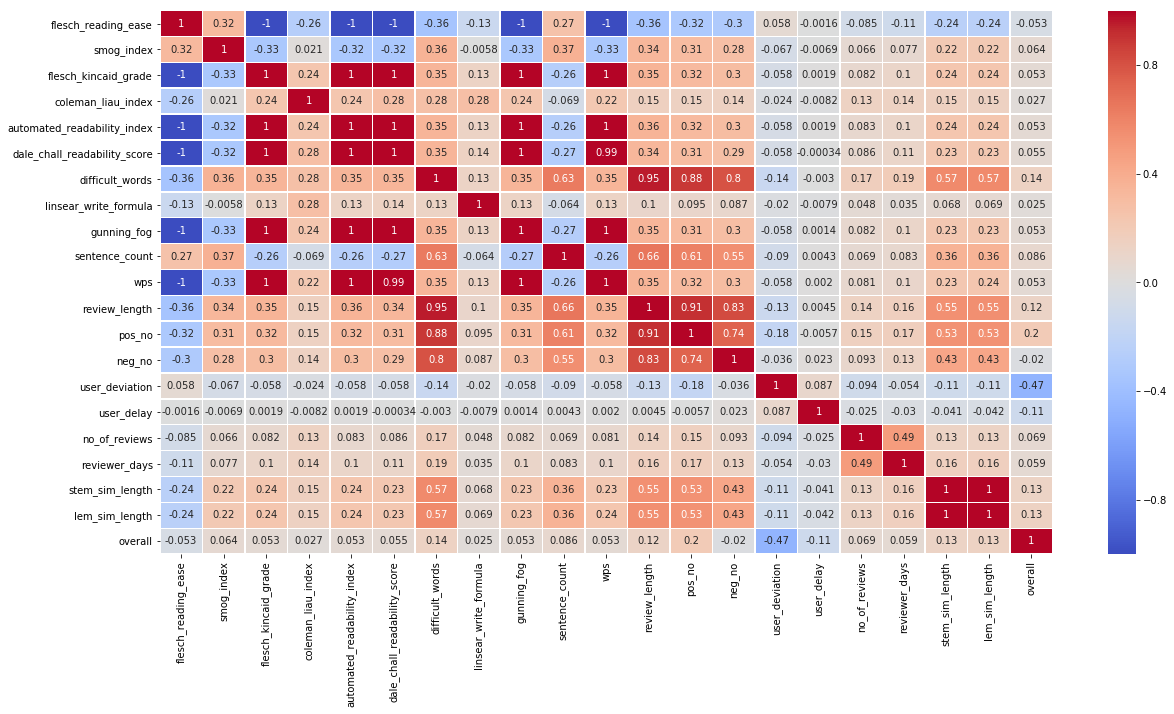

In [42]:
fig, ax = plt.subplots(figsize=(20,10))
ht=sns.heatmap(X.corr(),cmap='coolwarm', linewidths=.5,annot=True, ax=ax)

In [44]:
fig.savefig('correlation_Final.png')

In [46]:
features = X.columns
features

Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'no_of_reviews', 'reviewer_days', 'stem_sim_length', 'lem_sim_length',
       'overall'],
      dtype='object')

In [47]:
feature_size = len(features)

In [48]:
top_correlation_df = pd.DataFrame(columns=['Feature_1', 'Feature_2', 'Correlation'])
threshold = 0.8
for i in range(0,feature_size):
    f1 = features[i]
    for j in range(0,feature_size):
        if j > i :
            correlation = x_corr.iloc[i].iloc[j]
            f2 = features[j]
            if abs(correlation) >= threshold :
                corr_series = pd.Series({'Feature_1':f1,'Feature_2':f2,'Correlation':correlation})
                top_correlation_df=top_correlation_df.append(corr_series, ignore_index=True)

In [50]:
top_correlation_df.index = top_correlation_df.index +1

In [51]:
top_correlation_df

,Feature_1,Feature_2,Correlation
1,flesch_reading_ease,flesch_kincaid_grade,-0.999465
2,flesch_reading_ease,automated_readability_index,-0.999300
3,flesch_reading_ease,dale_chall_readability_score,-0.996831
4,flesch_reading_ease,gunning_fog,-0.999334
5,flesch_reading_ease,wps,-0.998677
6,flesch_kincaid_grade,automated_readability_index,0.999913
7,flesch_kincaid_grade,dale_chall_readability_score,0.995617
8,flesch_kincaid_grade,gunning_fog,0.999815
9,flesch_kincaid_grade,wps,0.999805
10,automated_readability_index,dale_chall_readability_score,0.995590


In [52]:
top_correlation_df.to_csv('Top_Correlation_Final.csv')

In [604]:
feature_size

21

In [707]:
X = text_df[[ 'smog_index', 'wps', 'coleman_liau_index',
       'linsear_write_formula', 'sentence_count', 'pos_no', 'neg_no']]

X=X.join(user_df[['user_deviation', 'user_delay','no_of_reviews', 'reviewer_days']])

X = X.join(meta_df[['lem_sim_length','overall']])

print(X.columns)
print("No of Features: ",len(X.columns))

Index(['smog_index', 'wps', 'coleman_liau_index', 'linsear_write_formula',
       'sentence_count', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'no_of_reviews', 'reviewer_days', 'lem_sim_length', 'overall'],
      dtype='object')
No of Features:  13


In [708]:
X.head()

,smog_index,wps,coleman_liau_index,linsear_write_formula,sentence_count,pos_no,neg_no,user_deviation,user_delay,no_of_reviews,reviewer_days,lem_sim_length,overall
0,0.0,427.000000,7.69,14.000000,1,2,4,1.399189,10152000.0,1,260.0,13,1.0
1,0.0,423.000000,9.72,8.666667,2,18,8,0.624437,10886400.0,1,1390.0,23,3.0
2,7.3,19.521739,5.92,7.666667,23,7,6,0.510375,7516800.0,1,929.0,16,2.0
3,10.8,12.800000,8.05,7.200000,5,2,0,0.442171,2678400.0,1,0.0,2,5.0
4,0.0,138.000000,8.09,4.400000,1,1,3,1.616074,7603200.0,1,0.0,2,1.0


In [709]:
y = review_df['helpfulness_score']
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [710]:
xgb_reg = xgb.XGBRegressor()

In [711]:
print("Best Learning Rate : {} , Best No of Estimators : {} , Best Subsample size : {}".format(best_learning_rate, best_n_estimators, best_subsample))

Best Learning Rate : 0.09 , Best No of Estimators : 400 , Best Subsample size : 0.9


In [712]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [713]:
predictions=xgb_reg.predict(X_test)

In [714]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.03749584249070656
Root Mean Squared Error (RMSE): 0.19363843236998837
Mean Absolute Error (MAE):      0.1335894220636948


In [693]:
best_rmse_4=1000
best_mae_4=1000
for rate in params['learning_rate'] :
    for estimator in params['n_estimators'] :
        for subsample in params['subsample'] :
            xgb_model = xgb.XGBRegressor(learning_rate= rate, n_estimators = estimator, subsample=subsample)
            xgb_model.fit(X_train,y_train)
            predictions=xgb_model.predict(X_test)
            rmse=math.sqrt(mean_squared_error(y_test,predictions))
            mae=mean_absolute_error(y_test,predictions)
            
            res_dict = {'learning_rate': rate, 'n_estimators': estimator, 'subsample': subsample, 'rmse' : rmse, 'mae' : mae }
            result_df.append(res_dict, ignore_index=True)

            print(res_dict)
            
            if(rmse<=best_rmse_4) :
                if(mae < best_mae_4) :
                    best_rmse_4 = rmse
                    best_mae_4 = mae
                    best_learning_rate_4 = rate
                    best_n_estimators_4 = estimator
                    best_subsample_4 = subsample
            

{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.3, 'rmse': 0.2033476304568681, 'mae': 0.1572598743815295}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.5, 'rmse': 0.20359316383768933, 'mae': 0.1574722327778122}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.9, 'rmse': 0.20379005892453583, 'mae': 0.1576244288572968}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 1, 'rmse': 0.20384708183632821, 'mae': 0.1576827554095967}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.3, 'rmse': 0.19731976332700435, 'mae': 0.1423085072352256}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.5, 'rmse': 0.197575500529425, 'mae': 0.1425071965580442}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.9, 'rmse': 0.19775580404169904, 'mae': 0.14270564787289575}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 1, 'rmse': 0.1978348977067556, 'mae': 0.1427958165350609}
{'learning_rate': 0.01, 'n_estimators': 400, 'subsample

In [694]:
best_mae_4

0.13235961470501104

In [695]:
best_rmse_4

0.1924226773642787

### Per-Feature Prediction

In [24]:
X = text_df[['flesch_reading_ease', 
       'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'sentence_count', 'wps', 'review_length', 'pos_no', 'neg_no']]

X=X.join(user_df[['user_deviation', 'user_delay','no_of_reviews', 'reviewer_days']])

X = X.join(meta_df[['stem_sim_length','lem_sim_length','overall']])

print("Features: ",X.columns)
print("No of Features: ",len(X.columns))

Features:  Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'no_of_reviews', 'reviewer_days', 'stem_sim_length', 'lem_sim_length',
       'overall'],
      dtype='object')
No of Features:  21


In [25]:
y = review_df['helpfulness_score']
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [18]:
featurewise_result= pd.DataFrame(columns=['feature','correlation','rmse-LR','mae-LR','rmse-RF','mae-RF','rmse-XGB','mae-XGB'])
for col in X.columns:
    tempdict={}
    tempdict['feature']=col
    # GET CORRELATION WITH HELPFULNESS
    a = X[col]
    tempdict['correlation'] = a.corr(y)
    
    train = X_train[col]
    test  = X_test[col]
    
    train = np.array(train).reshape(-1,1)
    test = np.array(test).reshape(-1,1)
   
    #LINEAR REGRESSION
    lm = LinearRegression()
    lm.fit(train,y_train)
    predictions = lm.predict(test)
    
    tempdict['rmse-LR']=math.sqrt(mean_squared_error(y_test,predictions))
    tempdict['mae-LR']=mean_absolute_error(y_test,predictions)
    
    #RANDOM FOREST
    regressor = RandomForestRegressor(n_estimators=500, random_state=42)
    regressor.fit(train,y_train)
    preds_2 = regressor.predict(test)

    tempdict['rmse-RF']=math.sqrt(mean_squared_error(y_test,preds_2))
    tempdict['mae-RF']=mean_absolute_error(y_test,preds_2)
    
    #XGBOOST
    xgb_reg = xgb.XGBRegressor()
    xgb_reg.fit(train,y_train)
    preds_3 = xgb_reg.predict(test)
    
    tempdict['rmse-XGB'] = math.sqrt(mean_squared_error(y_test,preds_3))
    tempdict['mae-XGB'] = mean_absolute_error(y_test,preds_3)
    
    
    tempSeries=pd.Series(tempdict)
    featurewise_result=featurewise_result.append(tempSeries, ignore_index=True)
    

In [19]:
featurewise_result.to_csv('Featurewise_Final.csv', index=False)

### Category-wise Prediction

In [26]:
categorywise_result= pd.DataFrame(columns=['category','rmse-LR','mae-LR','rmse-RF','mae-RF', 'rmse-XGB', 'mae-XGB'])

In [27]:
#USER FEATURES vs. HELPFULNESS
tempdict={}
tempdict['category']='User Features'

cols = ['user_deviation', 'user_delay', 'no_of_reviews', 'reviewer_days']
train = X_train[cols]
test  = X_test[cols]

#LINEAR REGRESSION
lm = LinearRegression()
lm.fit(train,y_train)
predictions = lm.predict(test)


tempdict['rmse-LR']=math.sqrt(mean_squared_error(y_test,predictions))
tempdict['mae-LR']=mean_absolute_error(y_test,predictions)

#RANDOM FOREST
regressor = RandomForestRegressor(n_estimators=500, random_state=42)
regressor.fit(train,y_train)
preds_2 = regressor.predict(test)

tempdict['rmse-RF']=math.sqrt(mean_squared_error(y_test,preds_2))
tempdict['mae-RF']=mean_absolute_error(y_test,preds_2)

#XGBOOST
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(train,y_train)
preds_3 = xgb_reg.predict(test)

tempdict['rmse-XGB'] = math.sqrt(mean_squared_error(y_test,preds_3))
tempdict['mae-XGB'] = mean_absolute_error(y_test,preds_3)

tempSeries=pd.Series(tempdict)
categorywise_result=categorywise_result.append(tempSeries, ignore_index=True)

In [28]:
categorywise_result

,category,rmse-LR,mae-LR,rmse-RF,mae-RF,rmse-XGB,mae-XGB
0,User Features,0.223521,0.159481,0.236387,0.165092,0.221966,0.158669


In [29]:
#REVIEW TEXT FEATURES vs. HELPFULNESS
tempdict={}
tempdict['category']='Review Text Features'

cols = ['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no',]
train = X_train[cols]
test  = X_test[cols]

#LINEAR REGRESSION
lm = LinearRegression()
lm.fit(train,y_train)
predictions = lm.predict(test)


tempdict['rmse-LR']=math.sqrt(mean_squared_error(y_test,predictions))
tempdict['mae-LR']=mean_absolute_error(y_test,predictions)

#RANDOM FOREST
regressor = RandomForestRegressor(n_estimators=500, random_state=42)
regressor.fit(train,y_train)
preds_2 = regressor.predict(test)


tempdict['rmse-RF']=math.sqrt(mean_squared_error(y_test,preds_2))
tempdict['mae-RF']=mean_absolute_error(y_test,preds_2)

#XGBOOST
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(train,y_train)
preds_3 = xgb_reg.predict(test)

tempdict['rmse-XGB'] = math.sqrt(mean_squared_error(y_test,preds_3))
tempdict['mae-XGB'] = mean_absolute_error(y_test,preds_3)

tempSeries=pd.Series(tempdict)
categorywise_result=categorywise_result.append(tempSeries, ignore_index=True)

In [30]:
#METADATA FEATURES vs. HELPFULNESS
tempdict={}
tempdict['category']='Meta Data Features'

cols = ['stem_sim_length', 'lem_sim_length', 'overall']
train = X_train[cols]
test  = X_test[cols]

#LINEAR REGRESSION
lm = LinearRegression()
lm.fit(train,y_train)
predictions = lm.predict(test)


tempdict['rmse-LR']=math.sqrt(mean_squared_error(y_test,predictions))
tempdict['mae-LR']=mean_absolute_error(y_test,predictions)

#RANDOM FOREST
regressor = RandomForestRegressor(n_estimators=500, random_state=42)
regressor.fit(train,y_train)
preds_2 = regressor.predict(test)


tempdict['rmse-RF']=math.sqrt(mean_squared_error(y_test,preds_2))
tempdict['mae-RF']=mean_absolute_error(y_test,preds_2)

#XGBOOST
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(train,y_train)
preds_3 = xgb_reg.predict(test)

tempdict['rmse-XGB'] = math.sqrt(mean_squared_error(y_test,preds_3))
tempdict['mae-XGB'] = mean_absolute_error(y_test,preds_3)

tempSeries=pd.Series(tempdict)
categorywise_result=categorywise_result.append(tempSeries, ignore_index=True)

In [31]:
categorywise_result.to_csv('Categorywise_Final.csv', index=False)

In [32]:
categorywise_result

,category,rmse-LR,mae-LR,rmse-RF,mae-RF,rmse-XGB,mae-XGB
0,User Features,0.223521,0.159481,0.236387,0.165092,0.221966,0.158669
1,Review Text Features,0.225886,0.165162,0.223141,0.162692,0.217774,0.156143
2,Meta Data Features,0.208531,0.145716,0.206249,0.142711,0.204963,0.141700


### Model-wise Prediction - All Feature

In [35]:
modelwise_result = pd.DataFrame(columns=['Prediction Model', 'RMSE', 'MAE'])

In [36]:
grid_learning_rate=0.09
grid_n_estimators = 500
grid_subsample = 0.9

tempdict={}

train = X_train
test  = X_test

#LINEAR REGRESSION
tempdict['Prediction Model']='Linear Regression'
lm = LinearRegression()
lm.fit(train,y_train)
predictions = lm.predict(test)


tempdict['RMSE']=math.sqrt(mean_squared_error(y_test,predictions))
tempdict['MAE']=mean_absolute_error(y_test,predictions)

tempSeries=pd.Series(tempdict)
modelwise_result=modelwise_result.append(tempSeries, ignore_index=True)

#RANDOM FOREST
tempdict['Prediction Model']='Random Forest'
regressor = RandomForestRegressor(n_estimators=500, random_state=42)
regressor.fit(train,y_train)
preds_2 = regressor.predict(test)


tempdict['RMSE']=math.sqrt(mean_squared_error(y_test,preds_2))
tempdict['MAE']=mean_absolute_error(y_test,preds_2)

tempSeries=pd.Series(tempdict)
modelwise_result=modelwise_result.append(tempSeries, ignore_index=True)

#XGBOOST
tempdict['Prediction Model']='Extreme Gradient Boosting'
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(train,y_train)
preds_3 = xgb_reg.predict(test)

tempdict['RMSE']=math.sqrt(mean_squared_error(y_test,preds_3))
tempdict['MAE']=mean_absolute_error(y_test,preds_3)

tempSeries=pd.Series(tempdict)
modelwise_result=modelwise_result.append(tempSeries, ignore_index=True)

#XGBOOST WITH GRID SEARCH
tempdict['Prediction Model']='XGBoost with Grid Search'
xgb_reg = xgb.XGBRegressor(learning_rate=grid_learning_rate, n_estimators=grid_n_estimators, subsample=grid_subsample)
xgb_reg.fit(train,y_train)
preds_3 = xgb_reg.predict(test)

tempdict['RMSE']=math.sqrt(mean_squared_error(y_test,preds_3))
tempdict['MAE']=mean_absolute_error(y_test,preds_3)

tempSeries=pd.Series(tempdict)
modelwise_result=modelwise_result.append(tempSeries, ignore_index=True)


In [37]:
modelwise_result.to_csv('All_Feature_Final.csv', index=False)

In [38]:
modelwise_result

,Prediction Model,RMSE,MAE
0,Linear Regression,0.201030,0.141376
1,Random Forest,0.194449,0.136248
2,Extreme Gradient Boosting,0.192803,0.132932
3,XGBoost with Grid Search,0.192087,0.131920


## Usage of Helper Classifier

In [128]:
X = text_df[['flesch_reading_ease', 
       'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'sentence_count', 'wps', 'review_length', 'pos_no', 'neg_no']]

X=X.join(user_df[['user_deviation', 'user_delay','no_of_reviews', 'reviewer_days']])

X = X.join(meta_df[['stem_sim_length','lem_sim_length','overall']])

X = X.join(helper_df['help_pred_2'])
X.columns

Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'no_of_reviews', 'reviewer_days', 'stem_sim_length', 'lem_sim_length',
       'overall', 'help_pred_2'],
      dtype='object')

In [129]:
X.head()

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,sentence_count,...,pos_no,neg_no,user_deviation,user_delay,no_of_reviews,reviewer_days,stem_sim_length,lem_sim_length,overall,help_pred_2
0,-336.56,0.0,166.3,7.69,211.1,26.44,44,14.000000,176.92,1,...,2,4,1.399189,10152000.0,1,260.0,15,13,1.0,0
1,-340.96,0.0,165.9,9.72,210.8,26.37,94,8.666667,175.64,2,...,18,8,0.624437,10886400.0,1,1390.0,24,23,3.0,1
2,85.52,7.3,6.2,5.92,7.2,5.87,36,7.666667,13.01,23,...,7,6,0.510375,7516800.0,1,929.0,17,16,2.0,0
3,66.94,10.8,7.1,8.05,6.3,6.99,11,7.200000,14.00,5,...,2,0,0.442171,2678400.0,1,0.0,2,2,5.0,1
4,-43.22,0.0,53.6,8.09,67.2,12.20,15,4.400000,61.55,1,...,1,3,1.616074,7603200.0,1,0.0,2,2,1.0,0


In [130]:
y = review_df['helpfulness_score']
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [131]:
xgb_reg = xgb.XGBRegressor()

In [132]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [133]:
predictions=xgb_reg.predict(X_test)

In [134]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.03728177323603432
Root Mean Squared Error (RMSE): 0.19308488608908342
Mean Absolute Error (MAE):      0.13320756116264879


In [ ]:
error_df = 

In [83]:
params = {
    'learning_rate': [0.01,0.09,0.1,0.2,0.5,0.9], 
    'n_estimators': [200,300,400,500], 
    'subsample': [0.3, 0.5, 0.9, 1]}

In [135]:
result_df = pd.DataFrame(columns=['learning_rate','n_estimators', 'subsample', 'rmse', 'mae'])

In [136]:
best_rmse_5=1000
best_mae_5=1000
for rate in params['learning_rate'] :
    for estimator in params['n_estimators'] :
        for subsample in params['subsample'] :
            xgb_model = xgb.XGBRegressor(learning_rate= rate, n_estimators = estimator, subsample=subsample)
            xgb_model.fit(X_train,y_train)
            predictions=xgb_model.predict(X_test)
            rmse=math.sqrt(mean_squared_error(y_test,predictions))
            mae=mean_absolute_error(y_test,predictions)
            
            res_dict = {'learning_rate': rate, 'n_estimators': estimator, 'subsample': subsample, 'rmse' : rmse, 'mae' : mae }
            result_df.append(res_dict, ignore_index=True)

            print(res_dict)
            
            if(rmse<=best_rmse_5) :
                if(mae < best_mae_5) :
                    best_rmse_5 = rmse
                    best_mae_5 = mae
                    best_learning_rate_5 = rate
                    best_n_estimators_5 = estimator
                    best_subsample_5 = subsample
            

{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.3, 'rmse': 0.20139545942771958, 'mae': 0.15560848916060288}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.5, 'rmse': 0.20160953301534293, 'mae': 0.1557887123412146}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.9, 'rmse': 0.20182420616036403, 'mae': 0.1559246233298197}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 1, 'rmse': 0.20180779338027474, 'mae': 0.15590294308081656}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.3, 'rmse': 0.19558117048017537, 'mae': 0.14089706748998346}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.5, 'rmse': 0.1957829190617543, 'mae': 0.14104662132640136}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.9, 'rmse': 0.19598129759494692, 'mae': 0.1412405058350879}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 1, 'rmse': 0.19602729681738457, 'mae': 0.1412806723727846}
{'learning_rate': 0.01, 'n_estimators': 400, 'sub

In [137]:
best_rmse_5

0.19223114620400353

In [138]:
best_mae_5

0.13215340062000652

In [89]:
experiment_data = {}

In [92]:
import datetime

In [139]:
experiment_data['columns'] = X.columns
experiment_data['result']={}
experiment_data['result']['best_rmse']=best_rmse_5
experiment_data['result']['best_mae'] = best_mae_5
experiment_data['result']['learning_rate'] = best_learning_rate_5
experiment_data['result']['n_estimators'] = best_n_estimators_5
experiment_data['result']['subsample']=best_subsample_5
experiment_data['date'] = str(datetime.datetime.now())

In [144]:
experiment_file = open('Experiment_Data.txt', 'a')

In [145]:
experiment_file.write("\n"+str(experiment_data))

660

In [147]:
print("\n"+str(experiment_data))


{'columns': Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'no_of_reviews', 'reviewer_days', 'stem_sim_length', 'lem_sim_length',
       'overall', 'help_pred_2'],
      dtype='object'), 'result': {'best_rmse': 0.19223114620400353, 'best_mae': 0.13215340062000652, 'learning_rate': 0.09, 'n_estimators': 400, 'subsample': 0.9}, 'date': '2019-05-14 17:51:24.549776'}


In [142]:
f = open('Experiment_Data.txt', 'r')

In [143]:
f.read()

"{'columns': Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',\n       'coleman_liau_index', 'automated_readability_index',\n       'dale_chall_readability_score', 'difficult_words',\n       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',\n       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',\n       'no_of_reviews', 'reviewer_days', 'stem_sim_length', 'lem_sim_length',\n       'overall', 'help_pred_1'],\n      dtype='object'), 'result': {'best_rmse': 0.19219438320768384, 'best_mae': 0.13215792251807856, 'learning_rate': 0.09, 'n_estimators': 400, 'subsample': 0.9}, 'date': '2019-05-13 23:38:24.676568'}{'columns': Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',\n       'coleman_liau_index', 'automated_readability_index',\n       'dale_chall_readability_score', 'difficult_words',\n       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',\n       'review_length', 'pos_no', 'neg_no', 'user_deviation

In [148]:
featurewise_result = pd.read_csv('Featurewise_Final.csv')

In [149]:
featurewise_result

,feature,correlation,rmse-LR,mae-LR,rmse-RF,mae-RF,rmse-XGB,mae-XGB
0,flesch_reading_ease,-0.111958,0.236515,0.172393,0.239447,0.173287,0.234108,0.170034
1,smog_index,0.115414,0.236336,0.172052,0.234847,0.170670,0.234702,0.170574
2,flesch_kincaid_grade,0.110595,0.236547,0.172405,0.235316,0.171055,0.233818,0.169690
3,coleman_liau_index,0.107465,0.236695,0.172458,0.236714,0.170643,0.233702,0.169747
4,automated_readability_index,0.110973,0.236538,0.172404,0.238498,0.173384,0.233903,0.169729
5,dale_chall_readability_score,0.113564,0.236480,0.172404,0.238596,0.173142,0.233639,0.169768
6,difficult_words,0.216660,0.232292,0.170116,0.224072,0.162243,0.223898,0.161996
7,linsear_write_formula,0.014142,0.237968,0.173186,0.233313,0.168712,0.233643,0.169577
8,gunning_fog,0.109958,0.236567,0.172418,0.245639,0.177515,0.233768,0.169728
9,sentence_count,0.121914,0.236107,0.172027,0.235254,0.171097,0.235211,0.171006


In [150]:
def get_least_error(lr, rf, xgb) :
    if xgb < rf and xgb < lr :
        return xgb
    if rf < lr and rf < xgb :
        return rf
    if lr < rf and lr < xgb :
        return lr

In [154]:
featurewise_result['least_mae'] = featurewise_result.apply(lambda row: get_least_error(row['mae-LR'],row['mae-RF'], row['mae-XGB']), axis=1)
featurewise_result['least_rmse'] = featurewise_result.apply(lambda row: get_least_error(row['rmse-LR'], row['rmse-RF'], row['rmse-XGB']), axis=1)

In [156]:
featurewise_result_sorted = featurewise_result.sort_values(by='least_mae')

In [159]:
featurewise_result_sorted.to_csv('Featurewise_Final.csv', index=False)

### Error Analysis

In [161]:
X = text_df[['flesch_reading_ease', 
       'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'sentence_count', 'wps', 'review_length', 'pos_no', 'neg_no']]

X=X.join(user_df[['user_deviation', 'user_delay','no_of_reviews', 'reviewer_days']])

X = X.join(meta_df[['stem_sim_length','lem_sim_length','overall']])

print("Features: ",X.columns)
print("No of Features: ",len(X.columns))

Features:  Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'no_of_reviews', 'reviewer_days', 'stem_sim_length', 'lem_sim_length',
       'overall'],
      dtype='object')
No of Features:  21


In [162]:
X.head()

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,sentence_count,...,review_length,pos_no,neg_no,user_deviation,user_delay,no_of_reviews,reviewer_days,stem_sim_length,lem_sim_length,overall
0,-336.56,0.0,166.3,7.69,211.1,26.44,44,14.000000,176.92,1,...,427,2,4,1.399189,10152000.0,1,260.0,15,13,1.0
1,-340.96,0.0,165.9,9.72,210.8,26.37,94,8.666667,175.64,2,...,846,18,8,0.624437,10886400.0,1,1390.0,24,23,3.0
2,85.52,7.3,6.2,5.92,7.2,5.87,36,7.666667,13.01,23,...,449,7,6,0.510375,7516800.0,1,929.0,17,16,2.0
3,66.94,10.8,7.1,8.05,6.3,6.99,11,7.200000,14.00,5,...,64,2,0,0.442171,2678400.0,1,0.0,2,2,5.0
4,-43.22,0.0,53.6,8.09,67.2,12.20,15,4.400000,61.55,1,...,138,1,3,1.616074,7603200.0,1,0.0,2,2,1.0


In [163]:
y = review_df['helpfulness_score']
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [164]:
xgb_reg = xgb.XGBRegressor(learning_rate=grid_learning_rate, n_estimators=grid_n_estimators, subsample=grid_subsample)

In [ ]:
print("Best Learning Rate : {} , Best No of Estimators : {} , Best Subsample size : {}".format(best_learning_rate, best_n_estimators, best_subsample))

In [165]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.09, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9)

In [166]:
predictions=xgb_reg.predict(X_test)

In [167]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.0368974164299238
Root Mean Squared Error (RMSE): 0.1920870022409736
Mean Absolute Error (MAE):      0.13192014023385665


In [168]:
error_list = abs(y_test-predictions)

In [177]:
error_df = pd.DataFrame()

In [179]:
error_df['y_test']=y_test
error_df['predictions'] = predictions
error_df['error'] = error_list

In [252]:
error_df.head(40)

,y_test,predictions,error,class_predict
69520,0.000000,0.926131,0.926131,1
5371,0.000000,0.918928,0.918928,1
74862,0.000000,0.915146,0.915146,1
61109,0.000000,0.912949,0.912949,1
42479,0.000000,0.911104,0.911104,1
30207,0.000000,0.909286,0.909286,1
62249,0.027027,0.931933,0.904906,1
26938,0.000000,0.904504,0.904504,1
61105,0.000000,0.901851,0.901851,1
22696,0.000000,0.896530,0.896530,1


In [254]:
error_df[(error_df['class_predict']==0) & (error_df['predictions'] > 0.5) & (error_df['y_test'] <= 0.5)].count()

y_test           2434
predictions      2434
error            2434
class_predict    2434
dtype: int64

In [256]:
error_df[(error_df['predictions']>0.5) & (error_df['y_test']<=0.5)].count()

y_test           3171
predictions      3171
error            3171
class_predict    3171
dtype: int64

In [187]:
error_df['class_predict']=helper_df['help_pred_2']

In [251]:
error_df[error_df['class_predict']==1]['error'].mean()

0.08892003573785723

In [184]:
error_df = error_df.sort_values(by=['error'],ascending=False)

In [195]:
error_df[error_df['error']> 0.5]['y_test'].mean()

0.18934951076361148

In [229]:
error_df[(error_df['y_test']>=0.0) & (error_df['predictions']<=1.0) & (error_df['predictions']>=0.0)]['error'].mean()

0.1319181610444203

In [213]:
len(error_df[error_df['y_test']<=0.5]['error'])

3882

In [265]:
error_df[(error_df['y_test']>0.9) & (error_df['class_predict']==0)].count()

y_test           2371
predictions      2371
error            2371
class_predict    2371
dtype: int64

In [269]:
error_df[error_df['class_predict']==0]['error'].count()

10134

In [209]:
len(error_df)

32510

In [214]:
3882*100/32510

11.940941248846508

In [237]:
error_df[error_df['y_test']==0.0]['class_predict'].mean()

0.12258064516129032

In [471]:
def get_revised_score(pred, label) :
    return pred + 0.05

In [528]:
def get_revised_score(pred, label) :
    pred = pred+0.05
    if pred > 1 :
        pred =1
    if pred < 0 :
        pred = 0
    if label == 0 and pred >= 0.9:
        pred = pred - 0.02
    return pred

In [529]:
  if pred > 1 :
        pred =1
    if pred <0 :
        pred =0
    if label==1 :
        return pred
    if pred <0.5 :
        return pred
    if pred >= 0.9 :
        return pred -0.015
    return pred + 0.05

IndentationError: unindent does not match any outer indentation level (<ipython-input-529-15a77bfd0ad5>, line 3)

In [530]:
get_revised_score(0.9,0)

0.93

In [531]:
error_df['revised_score'] = error_df.apply(lambda row : get_revised_score(row['predictions'], row['class_predict']), axis=1)

In [532]:
error_df['error_revised'] = abs(error_df['revised_score']-error_df['y_test'])

In [533]:
error_df['error_revised'].mean()

0.12806866003726933

### Usage of Inter-Feature correlation Graph

In [270]:
X = text_df[['smog_index', 'coleman_liau_index',
       'difficult_words', 'linsear_write_formula',
       'sentence_count', 'wps', 'pos_no']]

X=X.join(user_df[['user_deviation', 'user_delay','no_of_reviews', 'reviewer_days']])

X = X.join(meta_df[['lem_sim_length','overall']])

print("Features: ",X.columns)
print("No of Features: ",len(X.columns))

Features:  Index(['smog_index', 'coleman_liau_index', 'difficult_words',
       'linsear_write_formula', 'sentence_count', 'wps', 'pos_no',
       'user_deviation', 'user_delay', 'no_of_reviews', 'reviewer_days',
       'lem_sim_length', 'overall'],
      dtype='object')
No of Features:  13


In [271]:
X.head()

,smog_index,coleman_liau_index,difficult_words,linsear_write_formula,sentence_count,wps,pos_no,user_deviation,user_delay,no_of_reviews,reviewer_days,lem_sim_length,overall
0,0.0,7.69,44,14.000000,1,427.000000,2,1.399189,10152000.0,1,260.0,13,1.0
1,0.0,9.72,94,8.666667,2,423.000000,18,0.624437,10886400.0,1,1390.0,23,3.0
2,7.3,5.92,36,7.666667,23,19.521739,7,0.510375,7516800.0,1,929.0,16,2.0
3,10.8,8.05,11,7.200000,5,12.800000,2,0.442171,2678400.0,1,0.0,2,5.0
4,0.0,8.09,15,4.400000,1,138.000000,1,1.616074,7603200.0,1,0.0,2,1.0


In [272]:
y = review_df['helpfulness_score']
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [273]:
xgb_reg = xgb.XGBRegressor()

In [274]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [275]:
predictions=xgb_reg.predict(X_test)

In [276]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.03740666324834456
Root Mean Squared Error (RMSE): 0.19340802270936064
Mean Absolute Error (MAE):      0.13326267738249728


In [277]:
best_rmse_6=1000
best_mae_6=1000
for rate in params['learning_rate'] :
    for estimator in params['n_estimators'] :
        for subsample in params['subsample'] :
            xgb_model = xgb.XGBRegressor(learning_rate= rate, n_estimators = estimator, subsample=subsample)
            xgb_model.fit(X_train,y_train)
            predictions=xgb_model.predict(X_test)
            rmse=math.sqrt(mean_squared_error(y_test,predictions))
            mae=mean_absolute_error(y_test,predictions)
            
            res_dict = {'learning_rate': rate, 'n_estimators': estimator, 'subsample': subsample, 'rmse' : rmse, 'mae' : mae }
            result_df.append(res_dict, ignore_index=True)

            print(res_dict)
            
            if(rmse<=best_rmse_6) :
                if(mae < best_mae_6) :
                    best_rmse_6 = rmse
                    best_mae_6 = mae
                    best_learning_rate_6 = rate
                    best_n_estimators_6 = estimator
                    best_subsample_6 = subsample
            

{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.3, 'rmse': 0.20171749953146403, 'mae': 0.1559526248510373}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.5, 'rmse': 0.2019182641557227, 'mae': 0.15609815593138562}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.9, 'rmse': 0.2021600676265661, 'mae': 0.15625301169167322}
{'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 1, 'rmse': 0.20221236117143457, 'mae': 0.1563045985390589}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.3, 'rmse': 0.19590809982366242, 'mae': 0.14118442189511274}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.5, 'rmse': 0.196056843817347, 'mae': 0.14132035025056605}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.9, 'rmse': 0.19630457507962856, 'mae': 0.14153463879714134}
{'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 1, 'rmse': 0.1963364140473708, 'mae': 0.14158779812269956}
{'learning_rate': 0.01, 'n_estimators': 400, 'subsa

In [278]:
best_mae_6

0.1321202629181903

### Experiment : Mean Difference of Prediction

In [534]:
X = text_df[['flesch_reading_ease', 
       'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'sentence_count', 'wps', 'review_length', 'pos_no', 'neg_no']]

X=X.join(user_df[['user_deviation', 'user_delay','no_of_reviews', 'reviewer_days']])

X = X.join(meta_df[['stem_sim_length','lem_sim_length','overall']])

print("Features: ",X.columns)
print("No of Features: ",len(X.columns))

Features:  Index(['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'sentence_count', 'wps',
       'review_length', 'pos_no', 'neg_no', 'user_deviation', 'user_delay',
       'no_of_reviews', 'reviewer_days', 'stem_sim_length', 'lem_sim_length',
       'overall'],
      dtype='object')
No of Features:  21


In [535]:
X.head()

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,sentence_count,...,review_length,pos_no,neg_no,user_deviation,user_delay,no_of_reviews,reviewer_days,stem_sim_length,lem_sim_length,overall
0,-336.56,0.0,166.3,7.69,211.1,26.44,44,14.000000,176.92,1,...,427,2,4,1.399189,10152000.0,1,260.0,15,13,1.0
1,-340.96,0.0,165.9,9.72,210.8,26.37,94,8.666667,175.64,2,...,846,18,8,0.624437,10886400.0,1,1390.0,24,23,3.0
2,85.52,7.3,6.2,5.92,7.2,5.87,36,7.666667,13.01,23,...,449,7,6,0.510375,7516800.0,1,929.0,17,16,2.0
3,66.94,10.8,7.1,8.05,6.3,6.99,11,7.200000,14.00,5,...,64,2,0,0.442171,2678400.0,1,0.0,2,2,5.0
4,-43.22,0.0,53.6,8.09,67.2,12.20,15,4.400000,61.55,1,...,138,1,3,1.616074,7603200.0,1,0.0,2,2,1.0


In [536]:
y = review_df['helpfulness_score']
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [537]:
xgb_reg = xgb.XGBRegressor(learning_rate=grid_learning_rate, n_estimators=grid_n_estimators, subsample=grid_subsample)

In [538]:
print("Best Learning Rate : {} , Best No of Estimators : {} , Best Subsample size : {}".format(best_learning_rate, best_n_estimators, best_subsample))

NameError: name 'best_learning_rate' is not defined

In [540]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.09, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9)

In [541]:
predictions=xgb_reg.predict(X_test)

In [542]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,predictions)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,predictions))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,predictions)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.0368974164299238
Root Mean Squared Error (RMSE): 0.1920870022409736
Mean Absolute Error (MAE):      0.13192014023385665


In [543]:
preds_train = xgb_reg.predict(X_train)

In [544]:
err_train = preds_train-y_train

In [551]:
print(err_train.mean())

-2.7907002463167557e-05


In [552]:
preds_train_2 = preds_train - err_train.median()

In [554]:
err_train_2 =preds_train_2 - y_train

In [556]:
err_train.median()

-0.036126155277778405

In [562]:
err_train_2.median()

-1.849799324826762e-08

In [564]:
err_train

14019    0.072296
2513    -0.107392
67575   -0.009882
27635    0.202600
35219    0.019037
19071   -0.098061
74043   -0.009664
32637    0.019351
40561    0.114297
57269    0.493940
8604    -0.217952
61705   -0.127001
19452   -0.032631
31444   -0.008109
24728    0.088135
32691    0.178584
71632    0.300440
5637     0.193927
50247   -0.289423
56123    0.414839
38520   -0.096079
29493   -0.136129
33247   -0.044369
73743    0.108189
27047   -0.092839
73504    0.295462
77545    0.042740
31348   -0.193481
30865   -0.068068
56413   -0.100964
           ...   
21311   -0.101127
21459   -0.084898
3748     0.514119
71919   -0.282299
77257   -0.051957
74071    0.385073
63083   -0.029655
20191   -0.047516
15436    0.070426
28488   -0.268457
9772    -0.079731
18491    0.314923
53619   -0.082498
78447   -0.274420
63315    0.341613
32817   -0.123498
19566   -0.030091
78556    0.508471
71996   -0.156775
61173   -0.024932
35391   -0.053373
22056   -0.022553
17357   -0.146627
20463   -0.002380
77899    0

In [566]:
preds_train_3=pd.Series(preds_train)

In [567]:
preds_train_3[preds_train_3-y_train]

0.8818578124046326

#### Now with Test

In [559]:
preds_2 = predictions - err_train.median()

In [560]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,preds_2)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,preds_2))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,preds_2)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.038341095974403896
Root Mean Squared Error (RMSE): 0.19580882506772745
Mean Absolute Error (MAE):      0.12734134337808103


In [568]:
new_err_df = pd.DataFrame()

In [569]:
new_err_df

""


In [570]:
new_err_df['preds_train'] = preds_train

In [594]:
diff = preds_train - y_train

In [584]:
new_err_df['y_train'] = y_train_list

In [583]:
y_train_list=y_train.tolist()

In [595]:
new_err_df['err_train'] = diff.tolist()

In [599]:
new_err_df['err_train'].median()

-0.036126155277778405

In [610]:
new_err_df[(new_err_df['err_train']<=-0.02) & (new_err_df['err_train'] >= -0.04) ].mean()

preds_train    0.883305
err_train     -0.030175
y_train        0.913480
dtype: float64

In [607]:
new_err_df.count()

preds_train    48765
err_train      48765
y_train        48765
dtype: int64

In [633]:
def revise_preds(pred) :
    if pred >=0.880 and pred <=0.889 :
        return pred - err_train.median()
    return pred

In [ ]:
#####new_err_df['revised_preds'] = new_err_df.apply(lambda row: get_least_error(row['mae-LR'],row['mae-RF'], row['mae-XGB']), axis=1)

In [613]:
predictions_ser = pd.Series(predictions)

In [634]:
preds_3 = predictions_ser.apply(revise_preds)

In [635]:
preds_3.head()

0    0.939419
1    0.915579
2    0.932346
3    0.871317
4    0.870685
dtype: float64

In [636]:
# MSE : Mean Squared Error
mse=mean_squared_error(y_test,preds_3)

# RMSE : Root Mean Squared Error
rmse=math.sqrt(mean_squared_error(y_test,preds_3))

# MAE : Mean Absolute Error
mae=mean_absolute_error(y_test,preds_3)

print('Mean Squared Error (MSE):      ',mse)
print('Root Mean Squared Error (RMSE):',rmse)
print('Mean Absolute Error (MAE):     ',mae)

Mean Squared Error (MSE):       0.03694080933291586
Root Mean Squared Error (RMSE): 0.1921999202208884
Mean Absolute Error (MAE):      0.13159618640264975


In [638]:
help(xgb)

Help on package xgboost:

NAME
    xgboost - XGBoost: eXtreme Gradient Boosting library.

DESCRIPTION
    Contributors: https://github.com/dmlc/xgboost/blob/master/CONTRIBUTORS.md

PACKAGE CONTENTS
    callback
    compat
    core
    libpath
    plotting
    rabit
    sklearn
    training

CLASSES
    builtins.object
        xgboost.core.Booster
        xgboost.core.DMatrix
    sklearn.base.BaseEstimator(builtins.object)
        xgboost.sklearn.XGBModel
            xgboost.sklearn.XGBClassifier(xgboost.sklearn.XGBModel, sklearn.base.ClassifierMixin)
            xgboost.sklearn.XGBRanker
            xgboost.sklearn.XGBRegressor(xgboost.sklearn.XGBModel, sklearn.base.RegressorMixin)
    
    class Booster(builtins.object)
     |  A Booster of XGBoost.
     |  
     |  Booster is the model of xgboost, that contains low level routines for
     |  training, prediction and evaluation.
     |  
     |  Methods defined here:
     |  
     |  __copy__(self)
     |  
     |  __deepcopy__(self, 